In [91]:
import numpy as np
import pandas as pd
import re

In [92]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [93]:
df = pd.read_csv('../../../data/raw/nb_data/4. cleaned_data_L2/gurgaon_properties_cleaned_v1.csv')

In [94]:
df.duplicated().sum()

0

In [95]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3,store room,3.0,South-West,1 to 5 Year Old,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Vatika Sector Road', 'Gurgaon - Delhi Expy', 'Dwarka Expy', 'Euro International School, Sec 84', 'DPG Degree College', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


## 1. areaWithType

In [96]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
657,1.05,1940.0,Super Built up area 1940(180.23 sq.m.)Built Up area: 1175.97 sq.ft. (109.25 sq.m.)Carpet area: 834.96 sq.ft. (77.57 sq.m.)
3464,9.50,2844.0,Plot area 316(264.22 sq.m.)
378,1.47,1150.0,Carpet area: 1150 (106.84 sq.m.)
2349,1.40,1500.0,Super Built up area 1500(139.35 sq.m.)Carpet area: 1385 sq.ft. (128.67 sq.m.)
711,1.67,1590.0,Carpet area: 1671 (155.24 sq.m.)


In [97]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [98]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [99]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [100]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [101]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2720,1.19,flat,1350.0,Carpet area: 1350 (125.42 sq.m.),NaN,NaN,1350.0
3138,1.75,house,1575.0,Plot area 1575(146.32 sq.m.),NaN,NaN,NaN
1915,2.69,flat,2152.0,Super Built up area 2150(199.74 sq.m.),2150.0,NaN,NaN
3194,1.60,flat,2120.0,Super Built up area 2120(196.95 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),2120.0,NaN,1450.0
3534,4.75,flat,2813.0,Built Up area: 2813 (261.34 sq.m.),NaN,2813.0,NaN


In [102]:
df.duplicated().sum()

0

In [103]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(531, 7)

In [104]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,NaN,NaN
17,3.60,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
19,0.53,house,363.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
20,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
21,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [105]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1048
agePossession             1
nearbyLocations         170
furnishDetails          946
features                599
super_built_up_area    1805
built_up_area          2534
carpet_area            1807
dtype: int64

In [106]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [107]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,NaN,NaN
17,3.60,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
19,0.53,house,363.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
20,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
21,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [108]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [109]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [110]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [111]:
all_nan_df.head(10)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,172.0,NaN
17,3.60,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.0,NaN
19,0.53,house,363.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
20,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.0,NaN
21,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.0,NaN
25,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.0,NaN
40,1.10,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.0,NaN
41,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
45,5.50,house,2592.0,Plot area 288(240.8 sq.m.),NaN,288.0,NaN
48,3.50,house,1080.0,Plot area 120(100.34 sq.m.),NaN,120.0,NaN


In [112]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [113]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [114]:
all_nan_df.head(10)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,1548.0,NaN
17,3.60,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.0,NaN
19,0.53,house,363.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN
20,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.0,NaN
21,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.0,NaN
25,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.0,NaN
40,1.10,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.0,NaN
41,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.0,NaN
45,5.50,house,2592.0,Plot area 288(240.8 sq.m.),NaN,2592.0,NaN
48,3.50,house,1080.0,Plot area 120(100.34 sq.m.),NaN,1080.0,NaN


In [115]:
# update the original dataframe
df.update(all_nan_df)

In [116]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1048
agePossession             1
nearbyLocations         170
furnishDetails          946
features                599
super_built_up_area    1805
built_up_area          1989
carpet_area            1807
dtype: int64

In [117]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3,store room,3.0,South-West,1 to 5 Year Old,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Vatika Sector Road', 'Gurgaon - Delhi Expy', 'Dwarka Expy', 'Euro International School, Sec 84', 'DPG Degree College', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1735.0,NaN,1500.0
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,not available,9.0,NaN,0 to 1 Year Old,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",[],NaN,1508.0,NaN,NaN


## 2.additionalRoom

In [118]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1516
servant room                                      688
study room                                        243
others                                            219
pooja room                                        164
store room                                         97
study room,servant room                            97
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                55
pooja room,study room,servant room,others          54
pooja room,study room,servant room                 53
servant room,pooja room                            38
servant room,store room                            31
study room,others                                  26
pooja room,study room                              21
pooja room,others                                  16
pooja room,store room                              15
pooja room,st

In [119]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [120]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1257,not available,0,0,0,0,0
3511,servant room,0,1,0,0,0
3190,not available,0,0,0,0,0
2469,not available,0,0,0,0,0
1323,others,0,0,0,0,1


In [121]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3,store room,3.0,South-West,1 to 5 Year Old,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Vatika Sector Road', 'Gurgaon - Delhi Expy', 'Dwarka Expy', 'Euro International School, Sec 84', 'DPG Degree College', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1735.0,NaN,1500.0,0,0,1,0,0
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,not available,9.0,NaN,0 to 1 Year Old,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",[],NaN,1508.0,NaN,NaN,0,0,0,0,0


## 3.agePossession

In [122]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1646
5 to 10 Year Old       563
0 to 1 Year Old        503
undefined              307
10+ Year Old           303
Under Construction      88
Within 6 months         67
Within 3 months         24
Dec 2023                20
By 2023                 17
By 2024                 16
Dec 2024                15
Mar 2024                12
Jun 2024                 7
Dec 2025                 7
Jan 2024                 7
Aug 2023                 6
Oct 2024                 6
Nov 2023                 5
Oct 2023                 4
By 2025                  4
Sep 2023                 4
Aug 2024                 4
Jan 2025                 3
May 2024                 3
Nov 2024                 3
Jul 2024                 3
Feb 2024                 3
Jul 2025                 2
Jan 2026                 2
Jul 2027                 2
Jun 2027                 2
Mar 2025                 2
Aug 2025                 2
Sep 2025                 2
Apr 2026                 2
Dec 2026      

In [123]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [124]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [125]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           594
Moderately Old         563
Undefined              308
Old Property           303
Under Construction     267
Name: count, dtype: int64

In [126]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3,store room,3.0,South-West,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Vatika Sector Road', 'Gurgaon - Delhi Expy', 'Dwarka Expy', 'Euro International School, Sec 84', 'DPG Degree College', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1735.0,NaN,1500.0,0,0,1,0,0
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,not available,9.0,NaN,New Property,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",[],NaN,1508.0,NaN,NaN,0,0,0,0,0


## 4.furnishDetails

In [127]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
850,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2535,"['5 Fan', '1 Exhaust Fan', '1 Dining Table', '2 Geyser', '1 Stove', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '3 Bed', '3 Wardrobe', '1 Sofa', 'No Microwave', 'No Fridge', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']"
2747,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting']"
1954,"['1 Exhaust Fan', '1 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
1494,NaN,['Maintenance Staff']


In [128]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(rf"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include].copy()

In [129]:
furnishings_df.shape

(3681, 19)

In [130]:
furnishings_df.head(2)

,furnishDetails,Sofa,Modular Kitchen,Wardrobe,AC,TV,Chimney,Water Purifier,Geyser,Bed,Exhaust Fan,Light,Fan,Washing Machine,Fridge,Curtains,Microwave,Stove,Dining Table
0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

In [132]:
furnishings_df.sample(5)

,Sofa,Modular Kitchen,Wardrobe,AC,TV,Chimney,Water Purifier,Geyser,Bed,Exhaust Fan,Light,Fan,Washing Machine,Fridge,Curtains,Microwave,Stove,Dining Table
1707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3353,0,0,2,0,0,0,0,3,0,0,0,4,0,0,0,0,0,0
2713,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2570,0,1,11,0,0,9,0,11,0,1,17,7,0,0,0,0,0,0
533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [135]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

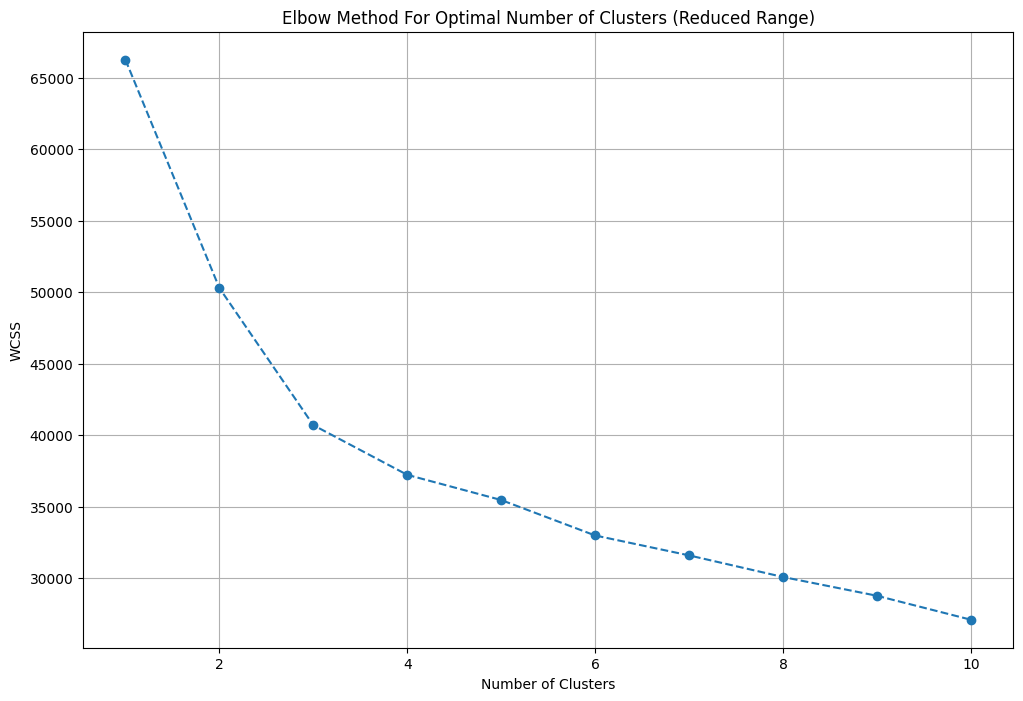

In [136]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [137]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [138]:
df.head(1).shape

(1, 43)

In [139]:
df = df.iloc[:,:-18]

In [140]:
cluster_assignments

array([2, 2, 1, ..., 0, 1, 2])

In [141]:
cluster_assignments.shape

(3681,)

In [142]:
df.shape

(3681, 25)

In [143]:
df['furnishing_type'] = cluster_assignments

In [144]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3,store room,3.0,South-West,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Vatika Sector Road', 'Gurgaon - Delhi Expy', 'Dwarka Expy', 'Euro International School, Sec 84', 'DPG Degree College', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1735.0,NaN,1500.0,0,0,1,0,0,2


In [145]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1256,NaN,2
760,[],2
1581,"['2 Wardrobe', '9 Fan', '1 Exhaust Fan', '3 Geyser', '16 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2986,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
994,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


## 5.features

In [146]:
df[['society','features']].sample(5)

,society,features
1400,sare green parc phase 3,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Club house / Community Center', 'Rain Water Harvesting']"
1280,chintels paradiso,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Water Storage', 'Park', 'Piped-gas', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
877,rof ananda,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3397,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2243,eldeco accolade,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [147]:
df['features'].isnull().sum()

599

In [148]:
import pandas as pd
app_df = pd.read_csv('../../../data/raw/nb_data/1. scraped_data/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [149]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [150]:
temp_df = df[df['features'].isnull()]

In [151]:
temp_df.shape

(599, 26)

In [152]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [153]:
df.loc[temp_df.index,'features'] = x.values

In [154]:
df['features'].isnull().sum()

457

In [155]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [156]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [157]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3231,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2337,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3609,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
features_binary_df.shape

(3681, 130)

In [159]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

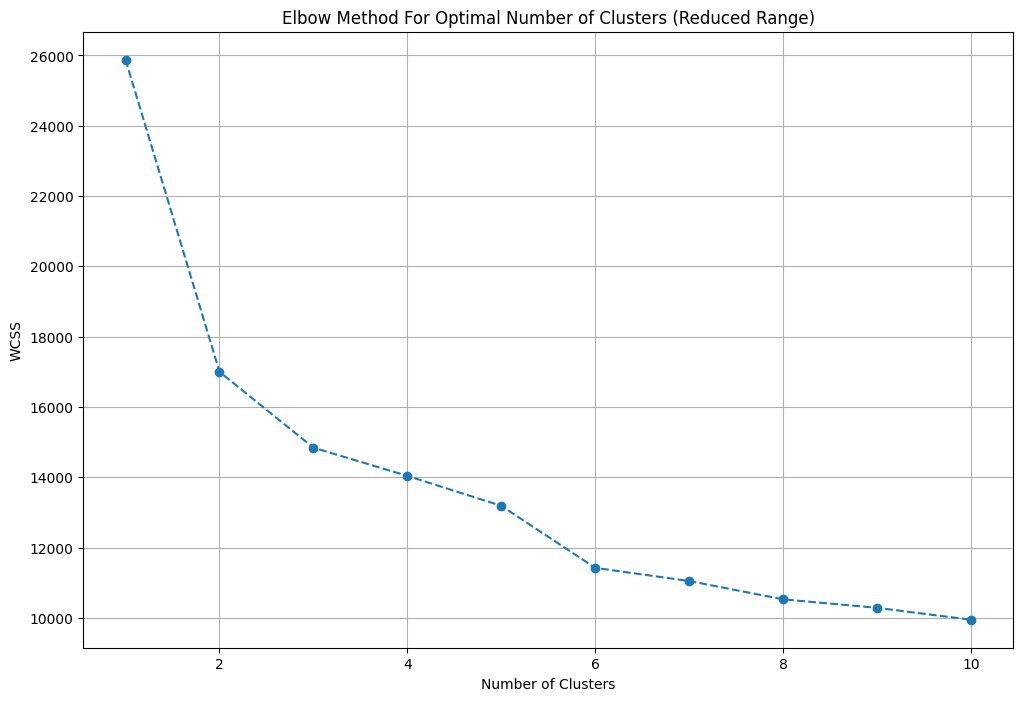

In [160]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [161]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [162]:
df['luxury_score'] = luxury_score

In [163]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,vatika gurgaon,sector 83,1.05,7000.0,1500.0,Super Built up area 1735(161.19 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3,store room,3.0,South-West,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Vatika Sector Road', 'Gurgaon - Delhi Expy', 'Dwarka Expy', 'Euro International School, Sec 84', 'DPG Degree College', 'Aarvy Healthcare Super Speciality', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']",NaN,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1735.0,NaN,1500.0,0,0,1,0,0,2,"[Feng Shui / Vaastu Compliant, Lift(s), Maintenance Staff, False Ceiling Lighting, Separate entry for servant room, Visitor Parking, Swimming Pool, Park, Security Personnel, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant]",79
1,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,not available,9.0,NaN,New Property,"['Airia Mall', 'Southern Peripheral Road', 'Sohna Road', 'Alpine Convent\xa0School', 'MKD Hospital', 'Indira Gandhi International Airport', 'Bhondsi Nature Park', 'Lemon Tree Hotel, Sohna Road', 'De Adventure Park', 'PVR Drive in Theatre']",[],NaN,1508.0,NaN,NaN,0,0,0,0,0,2,[],0


In [164]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [165]:
df.sample(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2597,flat,shyam apartment,sector 3,0.26,3714.0,700.0,Super Built up area 700(65.03 sq.m.)Carpet area: 530 sq.ft. (49.24 sq.m.),2,1,2,2.0,NaN,Relatively New,700.0,NaN,530.0,0,0,0,0,0,2,0
643,flat,conscient heritage max,sector 102,2.20,10237.0,2149.0,Super Built up area 2149(199.65 sq.m.),3,4,3+,9.0,South-East,Moderately Old,2149.0,NaN,NaN,1,1,0,0,0,2,125


In [166]:
df.shape

(3681, 23)

In [167]:
df.to_csv('../../../data/raw/nb_data/4. cleaned_data_L2/gurgaon_properties_cleaned_v2.csv',index=False)